In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import plotly.graph_objects as go

print("All packages imported successfully!")

import matplotlib.pyplot as plt
from matplotlib import font_manager

# 設定中文字型（使用系統中存在的字型）
font_path = "C:/Windows/Fonts/msjh.ttc"  # 微軟正黑體
font_prop = font_manager.FontProperties(fname=font_path)

# 設置全域字型
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 確保負號正常顯示

All packages imported successfully!


In [9]:
# 設定股票代碼和期間
stock_symbol = "006208.TW"  # 台股需加上 ".TW"
start_date = "2019-01-01"  # 開始日期
end_date = "2024-12-31"    # 結束日期

# 抓取數據
data = yf.download(stock_symbol, start=start_date, end=end_date)

# 檢查數據
print(data.head())  # 顯示前幾行數據

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker      006208.TW  006208.TW  006208.TW  006208.TW 006208.TW
Date                                                            
2019-01-02  34.892941  35.706575  34.892941  35.706575     58933
2019-01-03  34.562405  34.596307  34.536980  34.579356     46301
2019-01-04  33.918285  34.164071  33.875909  34.164071     79625
2019-01-07  34.808193  34.808193  34.325099  34.325099    156258
2019-01-08  34.664116  34.731917  34.664116  34.731917     42328


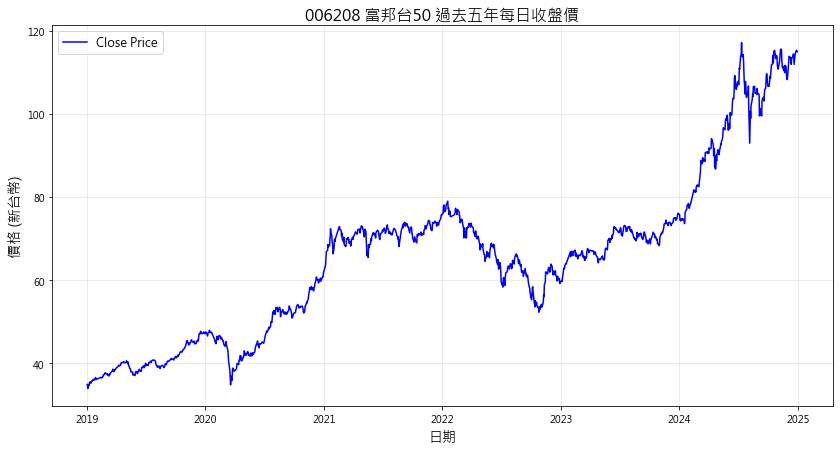

In [13]:
# 設置圖表大小
plt.figure(figsize=(14, 7))

# 繪製收盤價曲線
plt.plot(data.index, data['Close'], label='Close Price', color='blue')

# 添加標題和標籤
plt.title("006208 富邦台50 過去五年每日收盤價", fontsize=16)
plt.xlabel("日期", fontsize=14)
plt.ylabel("價格 (新台幣)", fontsize=14)

# 添加圖例
plt.legend(fontsize=12)

# 顯示網格
plt.grid(alpha=0.3)

# 顯示圖表
plt.show()


In [30]:
import yfinance as yf
import pandas as pd

# 抓取股票數據
stock_symbol = "006208.TW"
start_date = "2020-01-01"
end_date = "2024-12-31"
data = yf.download(stock_symbol, start=start_date, end=end_date)

# 添加年份欄位
data['Year'] = data.index.year

# 確保最終收盤價是數值
final_price = data['Close'].iloc[-1].values[0]  # 使用 .values[0] 來提取數值

# 初始化變數
investment_per_year = 10000  # 每年投資金額
high_price_shares = 0  # 每年股價最高點購買的總股數
low_price_shares = 0   # 每年股價最低點購買的總股數

# 分組處理每年的數據
for year, group in data.groupby('Year'):
    if year > 2024:  # 確保僅處理指定年份範圍
        break
    
    # 當年股價最高和最低
    max_price = group['High'].max()
    min_price = group['Low'].min()
    
    # 計算購買的股數
    high_price_shares += investment_per_year / max_price
    low_price_shares += investment_per_year / min_price

# 計算策略總資產
high_price_total = high_price_shares * final_price
low_price_total = low_price_shares * final_price

# 顯示結果
print(f"2024/12/31 收盤價: {final_price:.2f} 元")
print(f"策略 1 (每年最高價購買) 總資產: {high_price_total.item():.2f} 元")  # 使用 .item() 轉換為單一數值
print(f"策略 2 (每年最低價購買) 總資產: {low_price_total.item():.2f} 元")  # 使用 .item() 轉換為單一數值


[*********************100%***********************]  1 of 1 completed

2024/12/31 收盤價: 114.95 元
策略 1 (每年最高價購買) 總資產: 73036.83 元
策略 2 (每年最低價購買) 總資產: 109667.58 元


In [65]:
import yfinance as yf
import pandas as pd

# 抓取股票數據
stock_symbol = "006208.TW"
start_date = "2020-01-01"
end_date = "2024-12-31"
data = yf.download(stock_symbol, start=start_date, end=end_date)

# 添加年份欄位
data['Year'] = data.index.year

# 確保最終收盤價是數值
final_price = data['Close'].iloc[-1].values[0]  # 使用 .values[0] 來提取數值
# 顯示兩種投資策略的描述
print("三種投資策略：")
print("策略 1 (每年股價最高點投資)：在每年股價最高時投入資金，並以當年最高股價購買股票。")
print("策略 2 (每年股價最低點投資)：在每年股價最低時投入資金，並以當年最低股價購買股票。")
print("策略 3 (每年固定在每月25號投資)：每月固定投資，並在每月的25號股價買入股票。")
print("\n開始計算每年的投資結果：\n")

# 初始化策略資產
high_price_total = 0
low_price_total = 0
monthly_price_total = 0
total_investment = 0  # 記錄總投入資金

# 顯示每年策略的投入資金及股價
for year, group in data.groupby('Year'):
    if year > 2024:  # 確保僅處理指定年份範圍
        break
    
    # 當年股價最高和最低，強制將其轉為數值型態
    max_price = group['High'].max()
    min_price = group['Low'].min()
    
    # 確保 max_price 和 min_price 是單一數字
    max_price = float(max_price)
    min_price = float(min_price)
    
    # 計算每年策略1和策略2的投入資金及股價
    high_shares = investment_per_year / max_price
    low_shares = investment_per_year / min_price
    
    # 每月25號的股價，假設數據中有25號的股價資料
    monthly_shares = 0
    for month in range(1, 13):
        month_data = group[group.index.month == month]
        # 選擇當月25號的資料
        month_25 = month_data[month_data.index.day == 25]

        if not month_25.empty:
            # 如果25號有資料，選擇該日期的股價
            price_25 = month_25['Close'].iloc[0]
        else:
            # 如果25號沒有資料，找25號之前最近的股價
            before_25 = month_data[month_data.index.day < 25]

            if not before_25.empty:
                # 找到離25號最近的前一個股價
                price_25 = before_25['Close'].iloc[-1]
            else:
                # 如果25號前沒有資料，設定為None或其他預設值
                price_25 = None

        # 計算每月投資的股數
        if price_25 is not None:
            monthly_shares += investment_per_year / 12 / price_25  # 每月投資的股數

    # 最後將 monthly_shares 轉換為浮點數
    monthly_shares = float(monthly_shares)
 
    
    # 顯示每年結果
    print(f"{year} 年:")
    print(f"  策略 1: 購買價格為 {max_price:.2f} 元，投入資金為 {investment_per_year} 元，買入股數為 {high_shares:.2f} 股")
    print(f"  策略 2: 購買價格為 {min_price:.2f} 元，投入資金為 {investment_per_year} 元，買入股數為 {low_shares:.2f} 股")
    print(f"  策略 3: 每月25號買入，總股數為 {monthly_shares:.2f} 股")
    
    # 累積每年的資產
    high_price_total += high_shares * final_price
    low_price_total += low_shares * final_price
    monthly_price_total += monthly_shares * final_price
    
    # 累積每年投入的資金
    total_investment += investment_per_year

# 計算最終資產，包含所有年份的總資產
final_price = float(data['Close'].values[-1])  # 使用 .values 來確保取得單一數值
initial_investment = total_investment

# 計算投資報酬率
high_price_return = (high_price_total - initial_investment) / initial_investment * 100
low_price_return = (low_price_total - initial_investment) / initial_investment * 100
monthly_price_return = (monthly_price_total - initial_investment) / initial_investment * 100

# 計算年化報酬率 (CAGR)
start_year = data.index.year.min()  # 取得資料的最早年份
end_year = data.index.year.max()    # 取得資料的最後年份
years_invested = end_year - start_year + 1
high_price_cagr = ((high_price_total / initial_investment) ** (1 / years_invested) - 1) * 100
low_price_cagr = ((low_price_total / initial_investment) ** (1 / years_invested) - 1) * 100
monthly_price_cagr = ((monthly_price_total / initial_investment) ** (1 / years_invested) - 1) * 100

# 顯示結果
print(f"\n2024/12/31 收盤價: {final_price:.2f} 元")
print(f"策略 1 (每年最高價購買) 總資產: {high_price_total:.2f} 元，投資報酬率: {high_price_return:.2f}% 年化報酬率: {high_price_cagr:.2f}%")
print(f"策略 2 (每年最低價購買) 總資產: {low_price_total:.2f} 元，投資報酬率: {low_price_return:.2f}% 年化報酬率: {low_price_cagr:.2f}%")
print(f"策略 3 (每月25號買入) 總資產: {monthly_price_total:.2f} 元，投資報酬率: {monthly_price_return:.2f}% 年化報酬率: {monthly_price_cagr:.2f}%")


[*********************100%***********************]  1 of 1 completed

三種投資策略：
策略 1 (每年股價最高點投資)：在每年股價最高時投入資金，並以當年最高股價購買股票。
策略 2 (每年股價最低點投資)：在每年股價最低時投入資金，並以當年最低股價購買股票。
策略 3 (每年固定在每月25號投資)：每月固定投資，並在每月的25號股價買入股票。

開始計算每年的投資結果：

2024 年:
  策略 1: 購買價格為 117.59 元，投入資金為 10000 元，買入股數為 85.04 股
  策略 2: 購買價格為 73.45 元，投入資金為 10000 元，買入股數為 136.15 股
  策略 3: 每月25號買入，總股數為 101.05 股

2024/12/31 收盤價: 114.95 元
策略 1 (每年最高價購買) 總資產: 9775.48 元，投資報酬率: -2.25% 年化報酬率: -2.25%
策略 2 (每年最低價購買) 總資產: 15649.94 元，投資報酬率: 56.50% 年化報酬率: 56.50%
策略 3 (每月25號買入) 總資產: 11615.13 元，投資報酬率: 16.15% 年化報酬率: 16.15%


In [64]:
data.index.year.min()

2024